In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
df = pd.read_csv('cab_rides.csv')

## Data Cleaning

In [2]:
# Convert timestamp to datetime
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='ms')
df['hour'] = df['time_stamp'].dt.hour
df['day_of_week'] = df['time_stamp'].dt.dayofweek

# Handle missing values in price
df['price'].fillna(df['price'].mean(), inplace=True)

# Check for duplicates
df.drop_duplicates(inplace=True)

## Exploratory Data Analysis (EDA)

In [3]:
# Basic statistics of numeric columns
print(df.describe())

            distance                     time_stamp          price  \
count  693071.000000                         693071  693071.000000   
mean        2.189430  2018-12-05 21:35:09.764357120      16.545125   
min         0.020000     2018-11-26 03:40:46.318000       2.500000   
25%         1.280000  2018-11-28 22:26:08.356499968       9.500000   
50%         2.160000  2018-12-02 07:57:57.528999936      16.000000   
75%         2.920000  2018-12-14 22:45:08.976499968      22.500000   
max         7.860000     2018-12-18 19:15:10.943000      97.500000   
std         1.138937                            NaN       8.946069   

       surge_multiplier           hour    day_of_week  
count     693071.000000  693071.000000  693071.000000  
mean           1.013870      11.619137       2.781698  
min            1.000000       0.000000       0.000000  
25%            1.000000       6.000000       1.000000  
50%            1.000000      12.000000       3.000000  
75%            1.000000      18.0

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


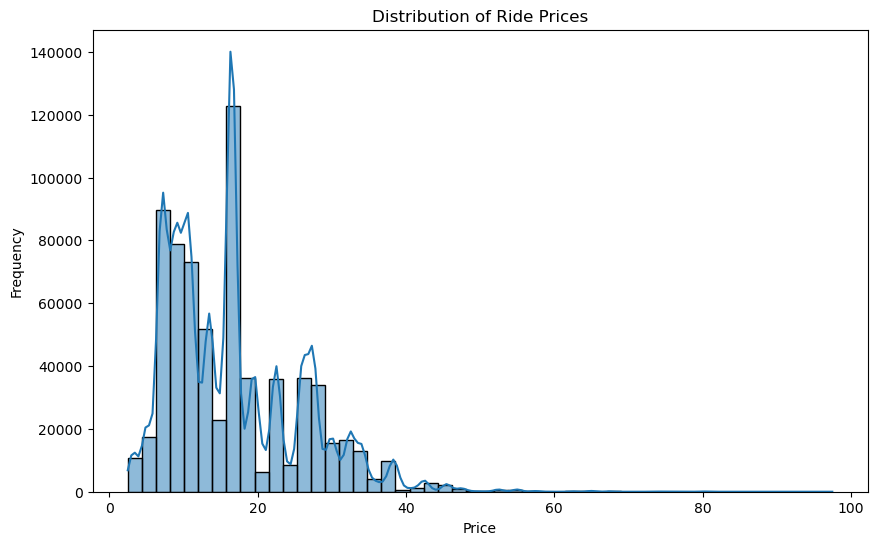

In [4]:
# Distribution of ride prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title('Distribution of Ride Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

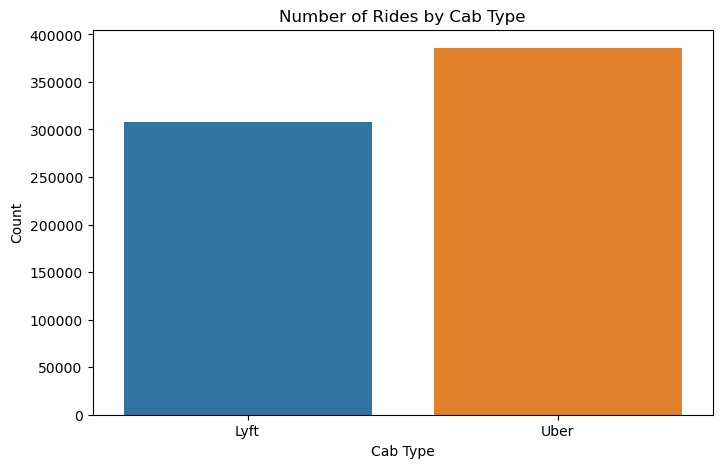

In [5]:
# Ride counts by cab type
plt.figure(figsize=(8, 5))
sns.countplot(x='cab_type', data=df)
plt.title('Number of Rides by Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Count')
plt.show()

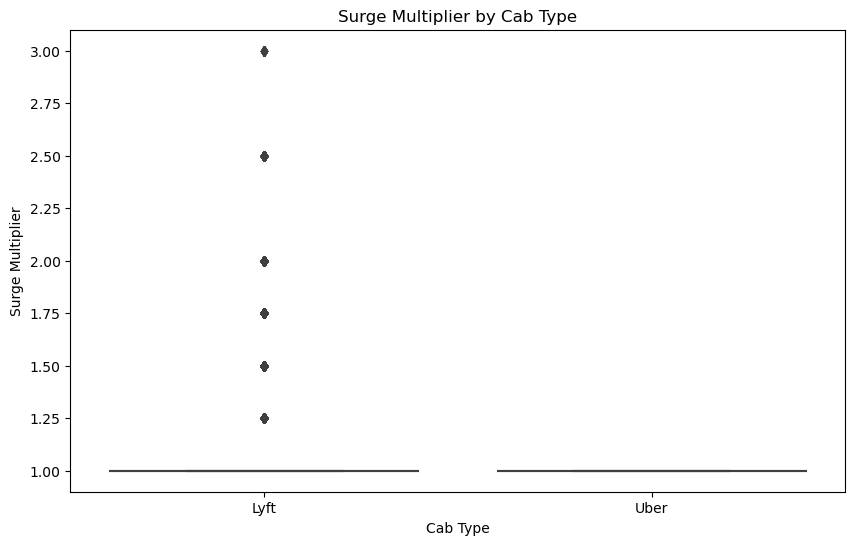

In [6]:
# Surge multiplier analysis
plt.figure(figsize=(10, 6))
sns.boxplot(x='cab_type', y='surge_multiplier', data=df)
plt.title('Surge Multiplier by Cab Type')
plt.xlabel('Cab Type')
plt.ylabel('Surge Multiplier')
plt.show()

## Time-based Analysis 

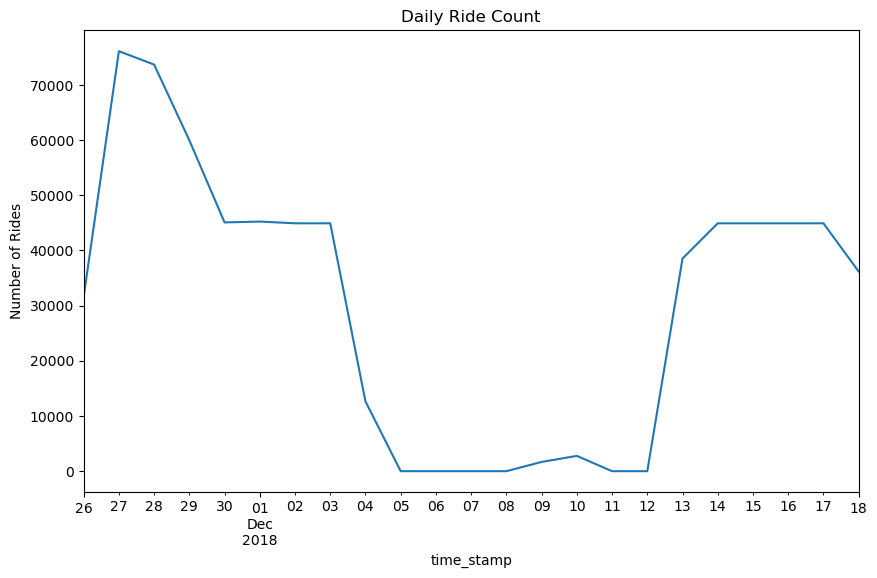

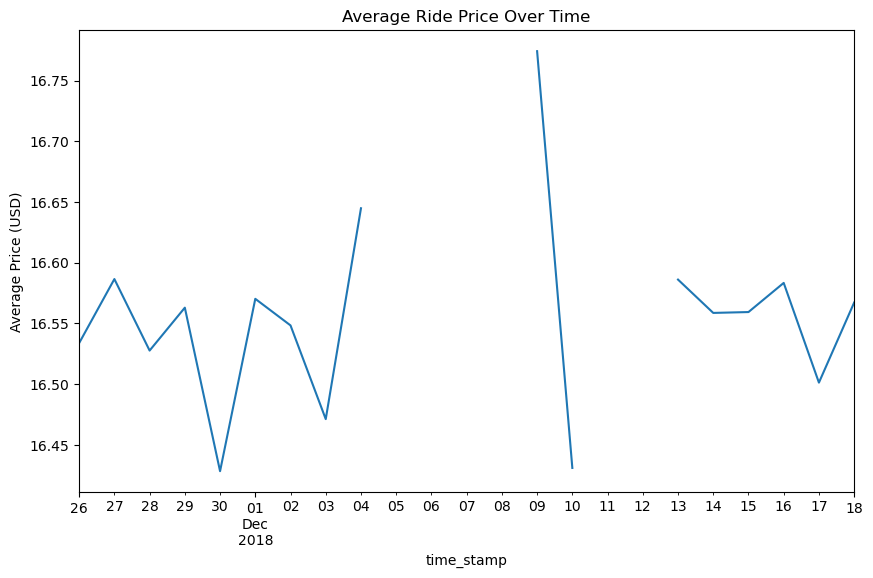

In [7]:
# Ride count over time
df.set_index('time_stamp', inplace=True)
df.resample('D').size().plot(title='Daily Ride Count', figsize=(10, 6))
plt.ylabel('Number of Rides')
plt.show()

# Price trends over time
df.resample('D')['price'].mean().plot(title='Average Ride Price Over Time', figsize=(10, 6))
plt.ylabel('Average Price (USD)')
plt.show()

## Correlation Matrix

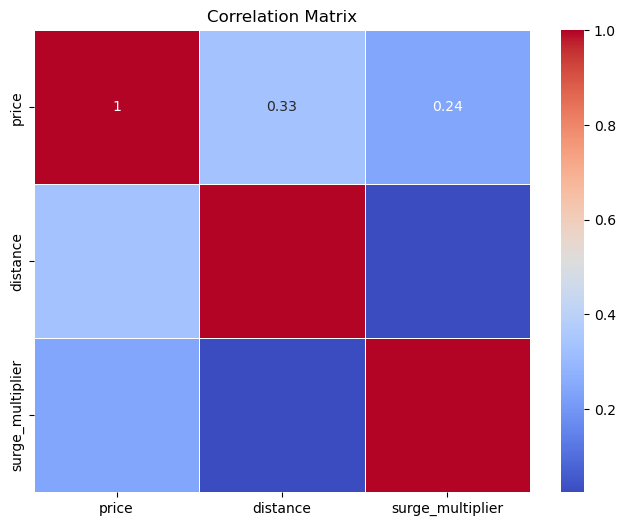

In [8]:
# Correlation matrix
correlation = df[['price', 'distance', 'surge_multiplier']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

## Feature Engineering

In [9]:
# Convert timestamp to datetime
df = pd.read_csv('cab_rides.csv')
df['time_stamp'] = pd.to_datetime(df['time_stamp'], unit='ms')
df['hour'] = df['time_stamp'].dt.hour
df['day_of_week'] = df['time_stamp'].dt.dayofweek

# Fill missing values in price
df['price'].fillna(df['price'].mean(), inplace=True)

# Drop unnecessary columns
df.drop(columns=['time_stamp', 'id', 'product_id'], inplace=True)

# One-Hot Encoding for categorical features
encoder = OneHotEncoder(sparse=False)
encoded_features = encoder.fit_transform(df[['cab_type', 'source', 'destination', 'name']])

# Create a DataFrame with the encoded features and concatenate it with the original data
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out())
df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns
df.drop(columns=['cab_type', 'source', 'destination', 'name'], inplace=True)

# Split the data into train and test sets
X = df.drop('price', axis=1)  # Features
y = df['price']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


## Linear Regression Model

In [10]:
# Initialize and fit the model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = linear_reg.predict(X_test)

# Evaluate the model
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print(f"Linear Regression RMSE: {rmse_lr}")
print(f"Linear Regression R²: {r2_lr}")

Linear Regression RMSE: 2.557319704573481
Linear Regression R²: 0.9181370608800102


## Random Forest Model

In [11]:
# Initialize and fit the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest RMSE: {rmse_rf}")
print(f"Random Forest R²: {r2_rf}")

Random Forest RMSE: 1.7518753604455048
Random Forest R²: 0.9615829783777536


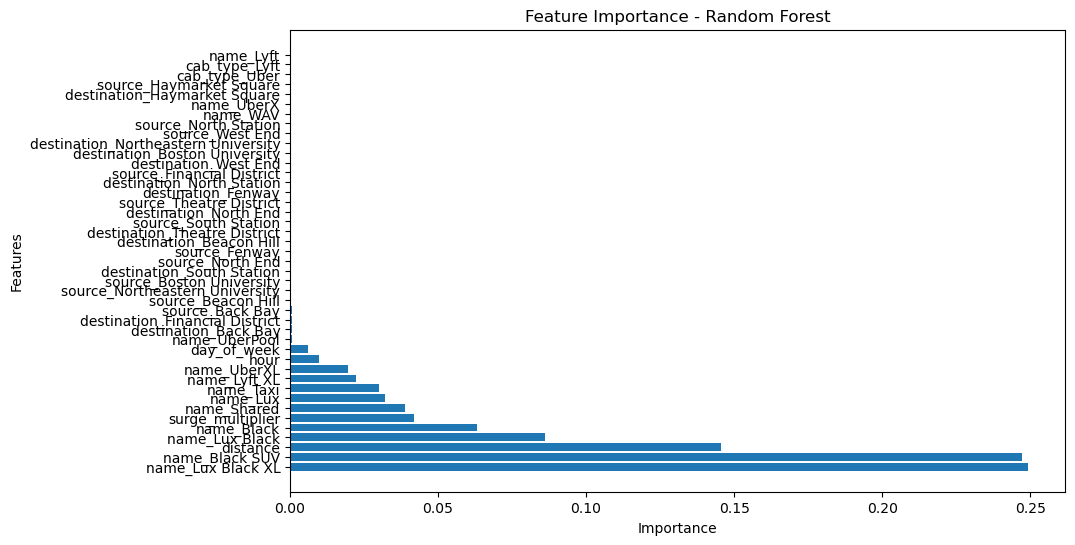

In [12]:
# Feature Importance (for Random Forest)
importances = rf_model.feature_importances_
feature_names = X.columns
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plot Feature Importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.title('Feature Importance - Random Forest')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()